In [2]:
import json
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import warnings
warnings.filterwarnings('ignore')

# ransac

In [ ]:
from estimateVP import VanishingPoints

In [ ]:
getvp2 = VanishingPoints('test_video_truck1.mp4')

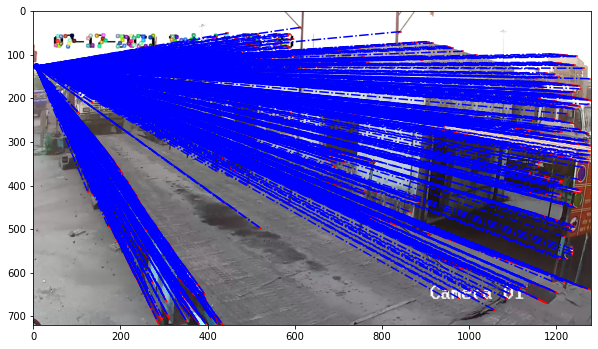

In [ ]:
vp1_from2,edgelets1_from2,img_from2 = getvp2.first_vp()

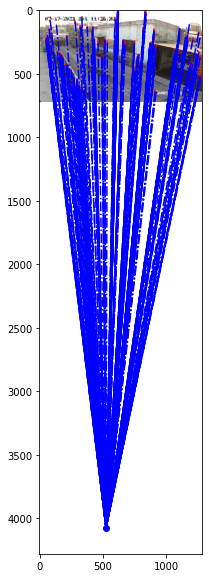

In [ ]:
vp2,edglets2 = getvp2.second_vp(vp1_from2,edgelets1_from2,img_from2)

In [ ]:
vp2

array([5.23886508e+02, 4.07766074e+03, 1.00000000e+00])

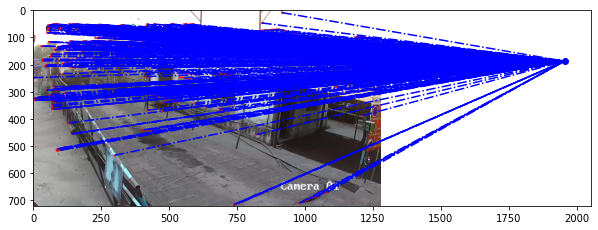

In [ ]:
vp3, f, pp, roadplane = getvp2.third_vp(vp1_from2, vp2, img_from2)

In [ ]:
vp3

array([1.95447751e+03, 1.87418973e+02, 1.00000000e+00])

In [ ]:
roadimg = cv2.imread('first_truck1_main.png')

In [ ]:
roadimg.shape

(720, 1280, 3)

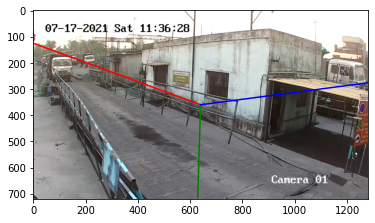

In [ ]:
plt.plot([pp[0],vp1_from2[0]], [pp[1],vp1_from2[1]], 'r-', 6)
plt.plot([pp[0],vp2[0]],[pp[1], vp2[1]], 'g-', 6)
plt.plot([pp[0],vp3[0]], [pp[1],vp3[1]], 'b-', 6)
plt.imshow(roadimg)
plt.show()

In [ ]:
video_name = 'test_video_truck1.mp4'
json_structure = {'video': [str(video_name)], 
                  "camera_calibration": {"vp1": list(vp1_from2),
                                         "vp2": list(vp2),
                                         "vp3": list(vp3),
                                          "pp": list(pp)}}


In [ ]:
with open('correct_vp_truck', 'w') as file:
    json.dump(json_structure, file)

# File Analysis

In [3]:
# Get Angles from main video
with open('testvid_truck1', 'r+') as file:
    structure = json.load(file)
    angles = structure['angles']

print('min theta: ',min(angles))
print('max theta: ',max(angles))

# sns.distplot(angles);

min theta:  123.291
max theta:  176.943


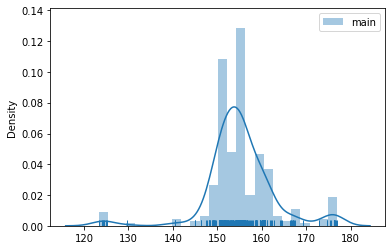

In [4]:
# Plot the angles 
sns.distplot(angles, rug = True, label= 'main');
plt.legend()
plt.show()